# Example of the aitlas toolbox in the context of image segmentation

## Import the required packages

In [ ]:
from aitlas.datasets import KappaSetDataset
from aitlas.utils import image_loader
from aitlas.models import DeepLabV3
from aitlas.models import DeepLabV3_13_bands
from aitlas.transforms import MinMaxNormTranspose
from aitlas.transforms import ResizeToTensor

## Visualize images and masks

Total number of patches: 9251


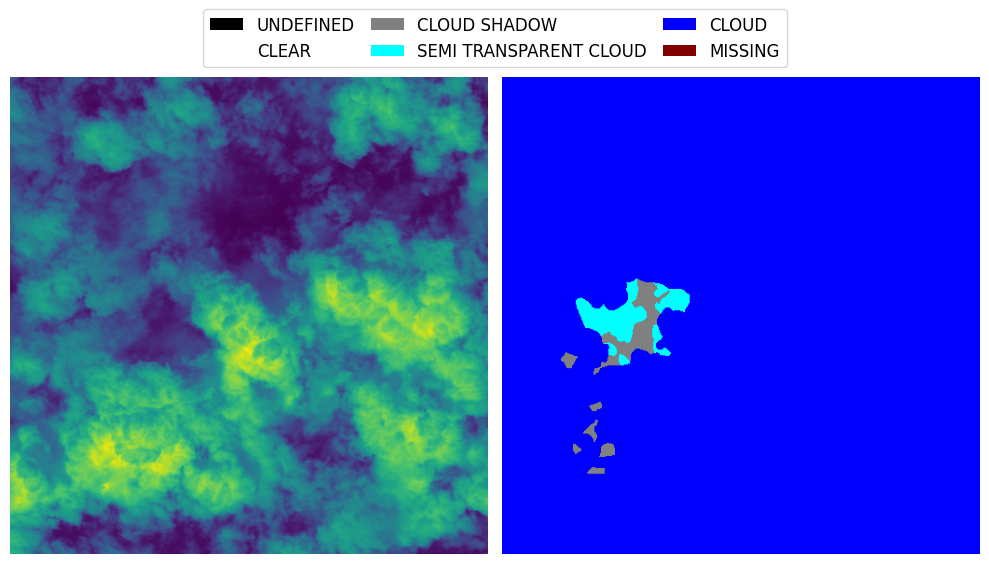

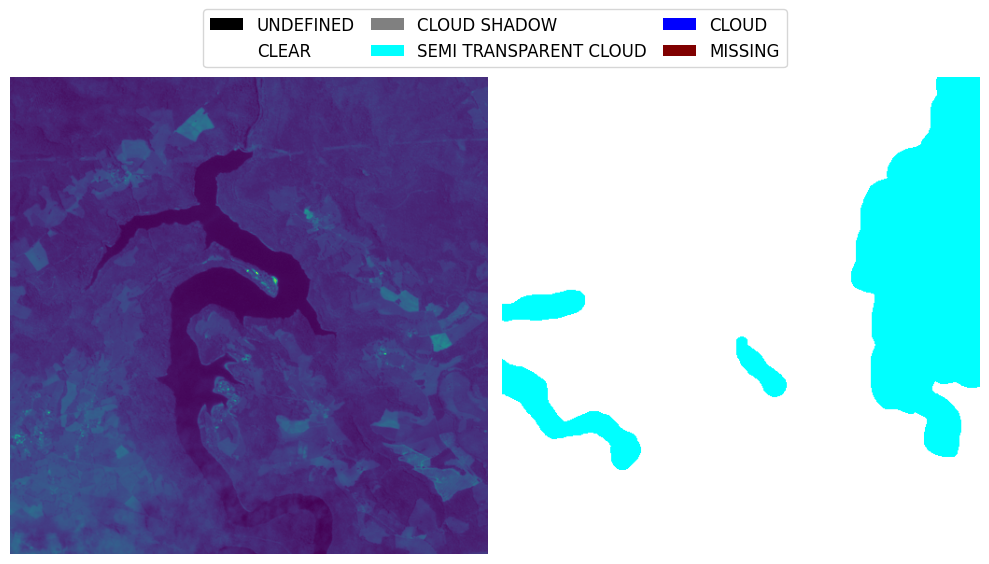

In [17]:
#for band B02
dataset_config = {
    "data_dir": "/home/dragik/data/KappaSet",
    "selection":"rgb"
}
dataset = KappaSetDataset(dataset_config)

print(f"Total number of patches: {len(dataset)}")
dataset.show_image(4);
dataset.show_image(10);

In [18]:
dataset.data_distribution_table()

,Number of pixels
UNDEFINED,7991799.0
CLEAR,894460480.0
CLOUD SHADOW,168400736.0
SEMI TRANSPARENT CLOUD,554390784.0
CLOUD,706216000.0
MISSING,93634200.0


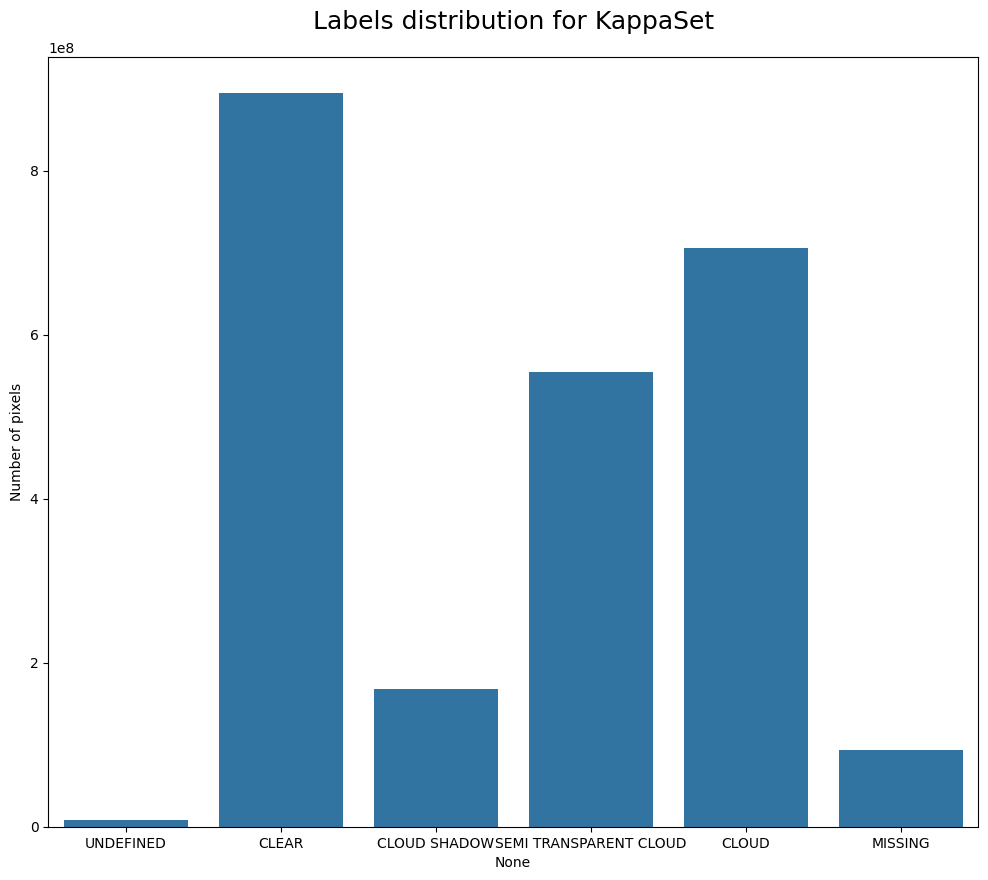

In [19]:
dataset.data_distribution_barchart();

# Working with Sentinel-2 true color RGB images

## Load training data

In [20]:
train_dataset_config = {
    "batch_size": 4,
    "shuffle": True,
    "num_workers": 4,
    "selection":"rgb",
    "data_dir": "/home/dragik/data/KappaSet",
    "transforms": ["aitlas.transforms.ResizePerChannelToTensor"],
    "target_transforms": ["aitlas.transforms.Transpose","aitlas.transforms.ResizePerChannelToTensor"],
}
train_dataset = KappaSetDataset(train_dataset_config)
len(train_dataset)

9251

## Create the model

In [21]:
epochs = 5
model_directory = "/home/dragik/data/KappaSet/experiments_old_labels_rgb"
model_config = {
    "num_classes": 6, 
    "learning_rate": 0.0001,
    "pretrained": True, 
    "threshold": 0.5,
    "metrics": ["iou"]
}

model = DeepLabV3(model_config)
model.prepare()

## Start the training

In [22]:
model.train_model(
    train_dataset=train_dataset,
    epochs=epochs,
    model_directory=model_directory,
    run_id='1'
);

Starting training.


training:   4%|███                                                                    | 99/2313 [00:07<02:00, 18.41it/s]

[1, 100], loss:  0.65809


training:   9%|██████                                                                | 199/2313 [00:13<01:56, 18.14it/s]

[1, 200], loss:  0.56381


training:  13%|█████████                                                             | 299/2313 [00:18<01:48, 18.54it/s]

[1, 300], loss:  0.50683


training:  17%|████████████                                                          | 399/2313 [00:24<01:46, 18.03it/s]

[1, 400], loss:  0.45440


training:  22%|███████████████                                                       | 499/2313 [00:29<01:39, 18.26it/s]

[1, 500], loss:  0.41868


training:  26%|██████████████████▏                                                   | 599/2313 [00:34<01:33, 18.41it/s]

[1, 600], loss:  0.40095


training:  30%|█████████████████████▏                                                | 699/2313 [00:40<01:27, 18.37it/s]

[1, 700], loss:  0.37049


training:  35%|████████████████████████▏                                             | 799/2313 [00:45<01:21, 18.54it/s]

[1, 800], loss:  0.35840


training:  39%|███████████████████████████▏                                          | 899/2313 [00:51<01:16, 18.42it/s]

[1, 900], loss:  0.34862


training:  43%|██████████████████████████████▏                                       | 999/2313 [00:56<01:11, 18.39it/s]

[1, 1000], loss:  0.35084


training:  48%|████████████████████████████████▊                                    | 1099/2313 [01:02<01:06, 18.37it/s]

[1, 1100], loss:  0.33162


training:  52%|███████████████████████████████████▊                                 | 1199/2313 [01:07<01:01, 18.25it/s]

[1, 1200], loss:  0.35510


training:  56%|██████████████████████████████████████▊                              | 1299/2313 [01:13<00:55, 18.23it/s]

[1, 1300], loss:  0.32679


training:  60%|█████████████████████████████████████████▋                           | 1399/2313 [01:18<00:49, 18.34it/s]

[1, 1400], loss:  0.31207


training:  65%|████████████████████████████████████████████▋                        | 1499/2313 [01:23<00:43, 18.64it/s]

[1, 1500], loss:  0.29360


training:  69%|███████████████████████████████████████████████▋                     | 1599/2313 [01:29<00:38, 18.38it/s]

[1, 1600], loss:  0.30100


training:  73%|██████████████████████████████████████████████████▋                  | 1699/2313 [01:34<00:33, 18.30it/s]

[1, 1700], loss:  0.29915


training:  78%|█████████████████████████████████████████████████████▋               | 1799/2313 [01:40<00:28, 18.27it/s]

[1, 1800], loss:  0.29265


training:  82%|████████████████████████████████████████████████████████▋            | 1899/2313 [01:45<00:22, 18.35it/s]

[1, 1900], loss:  0.29567


training:  86%|███████████████████████████████████████████████████████████▋         | 1999/2313 [01:51<00:17, 18.38it/s]

[1, 2000], loss:  0.27566


training:  91%|██████████████████████████████████████████████████████████████▌      | 2099/2313 [01:56<00:11, 18.39it/s]

[1, 2100], loss:  0.27852


training:  95%|█████████████████████████████████████████████████████████████████▌   | 2199/2313 [02:02<00:06, 18.36it/s]

[1, 2200], loss:  0.28720


training:  99%|████████████████████████████████████████████████████████████████████▌| 2299/2313 [02:07<00:00, 18.57it/s]

[1, 2300], loss:  0.26993


training: 100%|█████████████████████████████████████████████████████████████████████| 2313/2313 [02:08<00:00, 17.99it/s]

epoch: 1, time: 129, loss:  0.36278



testing on train set: 100%|█████████████████████████████████████████████████████████| 2313/2313 [00:42<00:00, 54.05it/s]

IOU:0.5877518617739852, IOU mean:0.48207393993502384, IOU per Class:[0.         0.66500717 0.35661679 0.42918457 0.66936462 0.77227049]



training:   4%|███                                                                    | 99/2313 [00:05<02:00, 18.38it/s]

[2, 100], loss:  0.28470


training:   9%|██████                                                                | 199/2313 [00:11<01:56, 18.15it/s]

[2, 200], loss:  0.29006


training:  13%|█████████                                                             | 299/2313 [00:16<01:50, 18.23it/s]

[2, 300], loss:  0.26548


training:  17%|████████████                                                          | 399/2313 [00:22<01:44, 18.27it/s]

[2, 400], loss:  0.26400


training:  22%|███████████████                                                       | 499/2313 [00:27<01:41, 17.95it/s]

[2, 500], loss:  0.28949


training:  26%|██████████████████▏                                                   | 599/2313 [00:33<01:33, 18.24it/s]

[2, 600], loss:  0.24575


training:  30%|█████████████████████▏                                                | 699/2313 [00:38<01:28, 18.23it/s]

[2, 700], loss:  0.28391


training:  35%|████████████████████████▏                                             | 799/2313 [00:44<01:23, 18.06it/s]

[2, 800], loss:  0.24774


training:  39%|███████████████████████████▏                                          | 899/2313 [00:49<01:20, 17.66it/s]

[2, 900], loss:  0.27111


training:  43%|██████████████████████████████▏                                       | 999/2313 [00:55<01:12, 18.23it/s]

[2, 1000], loss:  0.25762


training:  48%|████████████████████████████████▊                                    | 1099/2313 [01:00<01:03, 19.10it/s]

[2, 1100], loss:  0.23622


training:  52%|███████████████████████████████████▊                                 | 1199/2313 [01:06<00:58, 19.09it/s]

[2, 1200], loss:  0.24907


training:  56%|██████████████████████████████████████▊                              | 1299/2313 [01:11<00:52, 19.48it/s]

[2, 1300], loss:  0.23705


training:  60%|█████████████████████████████████████████▋                           | 1399/2313 [01:16<00:46, 19.75it/s]

[2, 1400], loss:  0.25359


training:  65%|████████████████████████████████████████████▋                        | 1499/2313 [01:21<00:41, 19.74it/s]

[2, 1500], loss:  0.26129


training:  69%|███████████████████████████████████████████████▋                     | 1599/2313 [01:26<00:36, 19.57it/s]

[2, 1600], loss:  0.26567


training:  73%|██████████████████████████████████████████████████▋                  | 1699/2313 [01:31<00:34, 18.01it/s]

[2, 1700], loss:  0.24226


training:  78%|█████████████████████████████████████████████████████▋               | 1799/2313 [01:37<00:27, 18.46it/s]

[2, 1800], loss:  0.22601


training:  82%|████████████████████████████████████████████████████████▋            | 1899/2313 [01:42<00:22, 18.45it/s]

[2, 1900], loss:  0.24734


training:  86%|███████████████████████████████████████████████████████████▋         | 1999/2313 [01:48<00:16, 19.62it/s]

[2, 2000], loss:  0.25847


training:  91%|██████████████████████████████████████████████████████████████▌      | 2099/2313 [01:53<00:11, 19.23it/s]

[2, 2100], loss:  0.25188


training:  95%|█████████████████████████████████████████████████████████████████▌   | 2199/2313 [01:58<00:05, 19.16it/s]

[2, 2200], loss:  0.23109


training:  99%|████████████████████████████████████████████████████████████████████▌| 2299/2313 [02:03<00:00, 19.01it/s]

[2, 2300], loss:  0.26204


training: 100%|█████████████████████████████████████████████████████████████████████| 2313/2313 [02:04<00:00, 18.56it/s]

epoch: 2, time: 124, loss:  0.25754



testing on train set: 100%|█████████████████████████████████████████████████████████| 2313/2313 [00:42<00:00, 54.67it/s]

IOU:0.598157286101585, IOU mean:0.36488915532210237, IOU per Class:[0.         0.69634093 0.25874389 0.49431574 0.72942241 0.01051197]



training:   4%|███                                                                    | 99/2313 [00:05<01:53, 19.59it/s]

[3, 100], loss:  0.22606


training:   9%|██████                                                                | 199/2313 [00:10<01:46, 19.84it/s]

[3, 200], loss:  0.25976


training:  13%|█████████                                                             | 299/2313 [00:15<01:42, 19.67it/s]

[3, 300], loss:  0.26071


training:  17%|████████████                                                          | 399/2313 [00:20<01:37, 19.73it/s]

[3, 400], loss:  0.24742


training:  22%|███████████████                                                       | 499/2313 [00:25<01:32, 19.56it/s]

[3, 500], loss:  0.25104


training:  26%|██████████████████▏                                                   | 599/2313 [00:30<01:26, 19.80it/s]

[3, 600], loss:  0.22931


training:  30%|█████████████████████▏                                                | 699/2313 [00:36<01:22, 19.66it/s]

[3, 700], loss:  0.23530


training:  35%|████████████████████████▏                                             | 799/2313 [00:41<01:17, 19.53it/s]

[3, 800], loss:  0.22181


training:  39%|███████████████████████████▏                                          | 899/2313 [00:46<01:12, 19.59it/s]

[3, 900], loss:  0.21966


training:  43%|██████████████████████████████▏                                       | 999/2313 [00:51<01:06, 19.69it/s]

[3, 1000], loss:  0.22525


training:  48%|████████████████████████████████▊                                    | 1099/2313 [00:56<01:01, 19.71it/s]

[3, 1100], loss:  0.22937


training:  52%|███████████████████████████████████▊                                 | 1199/2313 [01:01<00:56, 19.73it/s]

[3, 1200], loss:  0.24027


training:  56%|██████████████████████████████████████▊                              | 1299/2313 [01:06<00:51, 19.61it/s]

[3, 1300], loss:  0.23850


training:  60%|█████████████████████████████████████████▋                           | 1399/2313 [01:11<00:46, 19.67it/s]

[3, 1400], loss:  0.22159


training:  65%|████████████████████████████████████████████▋                        | 1499/2313 [01:17<00:41, 19.61it/s]

[3, 1500], loss:  0.22319


training:  69%|███████████████████████████████████████████████▋                     | 1599/2313 [01:22<00:36, 19.71it/s]

[3, 1600], loss:  0.21778


training:  73%|██████████████████████████████████████████████████▋                  | 1699/2313 [01:27<00:31, 19.72it/s]

[3, 1700], loss:  0.21796


training:  78%|█████████████████████████████████████████████████████▋               | 1799/2313 [01:32<00:26, 19.73it/s]

[3, 1800], loss:  0.23579


training:  82%|████████████████████████████████████████████████████████▋            | 1899/2313 [01:37<00:21, 19.71it/s]

[3, 1900], loss:  0.21900


training:  86%|███████████████████████████████████████████████████████████▋         | 1999/2313 [01:42<00:15, 19.74it/s]

[3, 2000], loss:  0.23063


training:  91%|██████████████████████████████████████████████████████████████▌      | 2099/2313 [01:47<00:10, 19.71it/s]

[3, 2100], loss:  0.24114


training:  95%|█████████████████████████████████████████████████████████████████▌   | 2199/2313 [01:52<00:05, 19.66it/s]

[3, 2200], loss:  0.24225


training:  99%|████████████████████████████████████████████████████████████████████▌| 2299/2313 [01:57<00:00, 19.73it/s]

[3, 2300], loss:  0.22391


training: 100%|█████████████████████████████████████████████████████████████████████| 2313/2313 [01:58<00:00, 19.51it/s]

epoch: 3, time: 118, loss:  0.23308



testing on train set: 100%|█████████████████████████████████████████████████████████| 2313/2313 [00:42<00:00, 54.09it/s]

IOU:0.6043720725413007, IOU mean:0.5187848536397602, IOU per Class:[0.         0.68608627 0.38879552 0.4118783  0.70505935 0.92088968]



training:   4%|███                                                                    | 99/2313 [00:05<02:02, 18.10it/s]

[4, 100], loss:  0.24341


training:   9%|██████                                                                | 199/2313 [00:11<01:55, 18.31it/s]

[4, 200], loss:  0.21951


training:  13%|█████████                                                             | 299/2313 [00:16<01:51, 18.11it/s]

[4, 300], loss:  0.23114


training:  17%|████████████                                                          | 399/2313 [00:22<01:45, 18.14it/s]

[4, 400], loss:  0.23823


training:  22%|███████████████                                                       | 499/2313 [00:27<01:40, 18.11it/s]

[4, 500], loss:  0.22544


training:  26%|██████████████████▏                                                   | 599/2313 [00:33<01:34, 18.09it/s]

[4, 600], loss:  0.21729


training:  30%|█████████████████████▏                                                | 699/2313 [00:39<01:29, 18.06it/s]

[4, 700], loss:  0.22165


training:  35%|████████████████████████▏                                             | 799/2313 [00:44<01:23, 18.11it/s]

[4, 800], loss:  0.22728


training:  39%|███████████████████████████▏                                          | 899/2313 [00:50<01:17, 18.15it/s]

[4, 900], loss:  0.20990


training:  43%|██████████████████████████████▏                                       | 999/2313 [00:55<01:12, 18.10it/s]

[4, 1000], loss:  0.22614


training:  48%|████████████████████████████████▊                                    | 1099/2313 [01:01<01:07, 18.12it/s]

[4, 1100], loss:  0.22172


training:  52%|███████████████████████████████████▊                                 | 1199/2313 [01:06<01:01, 18.15it/s]

[4, 1200], loss:  0.21618


training:  56%|██████████████████████████████████████▊                              | 1299/2313 [01:12<00:55, 18.22it/s]

[4, 1300], loss:  0.21389


training:  60%|█████████████████████████████████████████▋                           | 1399/2313 [01:17<00:50, 18.13it/s]

[4, 1400], loss:  0.24102


training:  65%|████████████████████████████████████████████▋                        | 1499/2313 [01:23<00:44, 18.09it/s]

[4, 1500], loss:  0.21810


training:  69%|███████████████████████████████████████████████▋                     | 1599/2313 [01:28<00:39, 18.05it/s]

[4, 1600], loss:  0.20769


training:  73%|██████████████████████████████████████████████████▋                  | 1699/2313 [01:34<00:34, 18.04it/s]

[4, 1700], loss:  0.21676


training:  78%|█████████████████████████████████████████████████████▋               | 1799/2313 [01:39<00:28, 18.08it/s]

[4, 1800], loss:  0.22972


training:  82%|████████████████████████████████████████████████████████▋            | 1899/2313 [01:45<00:22, 18.12it/s]

[4, 1900], loss:  0.23463


training:  86%|███████████████████████████████████████████████████████████▋         | 1999/2313 [01:50<00:17, 18.11it/s]

[4, 2000], loss:  0.22171


training:  91%|██████████████████████████████████████████████████████████████▌      | 2099/2313 [01:56<00:11, 18.12it/s]

[4, 2100], loss:  0.21591


training:  95%|█████████████████████████████████████████████████████████████████▌   | 2199/2313 [02:01<00:06, 17.98it/s]

[4, 2200], loss:  0.21672


training:  99%|████████████████████████████████████████████████████████████████████▌| 2299/2313 [02:07<00:00, 18.16it/s]

[4, 2300], loss:  0.21465


training: 100%|█████████████████████████████████████████████████████████████████████| 2313/2313 [02:08<00:00, 18.03it/s]


epoch: 4, time: 128, loss:  0.22291


testing on train set: 100%|█████████████████████████████████████████████████████████| 2313/2313 [00:42<00:00, 53.93it/s]

IOU:0.6674744385399508, IOU mean:0.5408090279220082, IOU per Class:[0.         0.72747577 0.37776156 0.51457223 0.77098167 0.85406293]



training:   4%|███                                                                    | 99/2313 [00:05<02:01, 18.25it/s]

[5, 100], loss:  0.20884


training:   9%|██████                                                                | 199/2313 [00:11<01:56, 18.15it/s]

[5, 200], loss:  0.21934


training:  13%|█████████                                                             | 299/2313 [00:16<01:50, 18.16it/s]

[5, 300], loss:  0.21026


training:  17%|████████████                                                          | 399/2313 [00:22<01:44, 18.24it/s]

[5, 400], loss:  0.21570


training:  22%|███████████████                                                       | 499/2313 [00:27<01:39, 18.29it/s]

[5, 500], loss:  0.20288


training:  26%|██████████████████▏                                                   | 599/2313 [00:33<01:34, 18.11it/s]

[5, 600], loss:  0.19770


training:  30%|█████████████████████▏                                                | 699/2313 [00:38<01:21, 19.70it/s]

[5, 700], loss:  0.22458


training:  35%|████████████████████████▏                                             | 799/2313 [00:43<01:17, 19.63it/s]

[5, 800], loss:  0.23419


training:  39%|███████████████████████████▏                                          | 899/2313 [00:48<01:12, 19.51it/s]

[5, 900], loss:  0.22043


training:  43%|██████████████████████████████▏                                       | 999/2313 [00:54<01:07, 19.50it/s]

[5, 1000], loss:  0.22457


training:  48%|████████████████████████████████▊                                    | 1099/2313 [00:59<01:01, 19.65it/s]

[5, 1100], loss:  0.22096


training:  52%|███████████████████████████████████▊                                 | 1199/2313 [01:04<00:56, 19.69it/s]

[5, 1200], loss:  0.21638


training:  56%|██████████████████████████████████████▊                              | 1299/2313 [01:09<00:52, 19.45it/s]

[5, 1300], loss:  0.21191


training:  60%|█████████████████████████████████████████▋                           | 1399/2313 [01:14<00:46, 19.60it/s]

[5, 1400], loss:  0.22525


training:  65%|████████████████████████████████████████████▋                        | 1499/2313 [01:19<00:41, 19.57it/s]

[5, 1500], loss:  0.21197


training:  69%|███████████████████████████████████████████████▋                     | 1599/2313 [01:24<00:37, 19.25it/s]

[5, 1600], loss:  0.21807


training:  73%|██████████████████████████████████████████████████▋                  | 1699/2313 [01:29<00:31, 19.47it/s]

[5, 1700], loss:  0.20946


training:  78%|█████████████████████████████████████████████████████▋               | 1799/2313 [01:34<00:26, 19.58it/s]

[5, 1800], loss:  0.21193


training:  82%|████████████████████████████████████████████████████████▋            | 1899/2313 [01:40<00:21, 19.61it/s]

[5, 1900], loss:  0.22757


training:  86%|███████████████████████████████████████████████████████████▋         | 1999/2313 [01:45<00:15, 19.77it/s]

[5, 2000], loss:  0.20659


training:  91%|██████████████████████████████████████████████████████████████▌      | 2099/2313 [01:50<00:10, 19.67it/s]

[5, 2100], loss:  0.21383


training:  95%|█████████████████████████████████████████████████████████████████▌   | 2199/2313 [01:55<00:05, 19.39it/s]

[5, 2200], loss:  0.20743


training:  99%|████████████████████████████████████████████████████████████████████▌| 2299/2313 [02:00<00:00, 18.60it/s]

[5, 2300], loss:  0.21961


training: 100%|█████████████████████████████████████████████████████████████████████| 2313/2313 [02:01<00:00, 19.03it/s]

epoch: 5, time: 122, loss:  0.21559



testing on train set: 100%|█████████████████████████████████████████████████████████| 2313/2313 [00:42<00:00, 54.08it/s]

IOU:0.6590219039067713, IOU mean:0.5487928786041414, IOU per Class:[0.         0.72582086 0.4114015  0.49075534 0.74629337 0.9184862 ]


Train loss: [0.27186072384933563, 0.2631596032122949, 0.24594526607376113, 0.19793427630303784, 0.20306171268247267]
Validation loss: []
Train time per epochs: [129, 124, 118, 128, 122]
Finished training. training time: 621


# Working with the 13 bands of Sentinel-2

## Load training data

In [12]:
train_dataset_config = {
    "batch_size": 8,
    "shuffle": True,
    "num_workers": 0,
    "selection":"all",
    "data_dir": "/home/dragik/data/KappaSet",
    "transforms": ["aitlas.transforms.ResizePerChannelToTensor"],
    "target_transforms": ["aitlas.transforms.Transpose","aitlas.transforms.ResizePerChannelToTensor"],
}
train_dataset = KappaSetDataset(train_dataset_config)
len(train_dataset)

9251

## Create the model

In [13]:
epochs = 3
model_directory = "/home/dragik/data/KappaSet/experiments_old_labels"
model_config = {
    "num_classes": 6, 
    "learning_rate": 0.0001,
    "pretrained": False, 
    "threshold": 0.5,
    "metrics": ["iou"],
    "input_dim": 13
}

model = DeepLabV3_13_bands(model_config)
model.prepare()

## Start the training

In [14]:
model.train_model(
    train_dataset=train_dataset,
    epochs=epochs,
    model_directory=model_directory,
    run_id='1'
);

Starting training.


training:   9%|██████                                                                 | 99/1157 [02:26<25:50,  1.47s/it]

[1, 100], loss:  0.56937


training:  17%|████████████                                                          | 199/1157 [04:53<23:12,  1.45s/it]

[1, 200], loss:  0.45707


training:  26%|██████████████████                                                    | 299/1157 [07:20<20:50,  1.46s/it]

[1, 300], loss:  0.38498


training:  34%|████████████████████████▏                                             | 399/1157 [09:46<18:39,  1.48s/it]

[1, 400], loss:  0.34178


training:  43%|██████████████████████████████▏                                       | 499/1157 [12:14<16:00,  1.46s/it]

[1, 500], loss:  0.32798


training:  52%|████████████████████████████████████▏                                 | 599/1157 [14:41<13:36,  1.46s/it]

[1, 600], loss:  0.31977


training:  60%|██████████████████████████████████████████▎                           | 699/1157 [17:07<11:08,  1.46s/it]

[1, 700], loss:  0.29828


training:  69%|████████████████████████████████████████████████▎                     | 799/1157 [19:35<08:39,  1.45s/it]

[1, 800], loss:  0.26104


training:  78%|██████████████████████████████████████████████████████▍               | 899/1157 [22:01<06:22,  1.48s/it]

[1, 900], loss:  0.28529


training:  86%|████████████████████████████████████████████████████████████▍         | 999/1157 [24:27<03:49,  1.45s/it]

[1, 1000], loss:  0.30182


training:  95%|█████████████████████████████████████████████████████████████████▌   | 1099/1157 [26:55<01:24,  1.45s/it]

[1, 1100], loss:  0.25355


training: 100%|█████████████████████████████████████████████████████████████████████| 1157/1157 [28:19<00:00,  1.47s/it]

epoch: 1, time: 1700, loss:  0.34111



testing on train set: 100%|█████████████████████████████████████████████████████████| 1157/1157 [21:42<00:00,  1.13s/it]

IOU:0.5868910433681771, IOU mean:0.37859570936042414, IOU per Class:[0.         0.61974684 0.38649266 0.4511998  0.75484168 0.05929328]



training:   9%|██████                                                                 | 99/1157 [02:25<26:08,  1.48s/it]

[2, 100], loss:  0.26782


training:  17%|████████████                                                          | 199/1157 [04:52<23:32,  1.47s/it]

[2, 200], loss:  0.25675


training:  26%|██████████████████                                                    | 299/1157 [07:18<21:02,  1.47s/it]

[2, 300], loss:  0.25653


training:  34%|████████████████████████▏                                             | 399/1157 [09:45<18:22,  1.45s/it]

[2, 400], loss:  0.26149


training:  43%|██████████████████████████████▏                                       | 499/1157 [12:12<16:01,  1.46s/it]

[2, 500], loss:  0.23263


training:  52%|████████████████████████████████████▏                                 | 599/1157 [14:38<13:23,  1.44s/it]

[2, 600], loss:  0.22752


training:  60%|██████████████████████████████████████████▎                           | 699/1157 [17:00<10:43,  1.40s/it]

[2, 700], loss:  0.25289


training:  69%|████████████████████████████████████████████████▎                     | 799/1157 [19:21<08:39,  1.45s/it]

[2, 800], loss:  0.25290


training:  78%|██████████████████████████████████████████████████████▍               | 899/1157 [21:47<06:17,  1.46s/it]

[2, 900], loss:  0.24161


training:  86%|████████████████████████████████████████████████████████████▍         | 999/1157 [24:12<03:40,  1.39s/it]

[2, 1000], loss:  0.23913


training:  95%|█████████████████████████████████████████████████████████████████▌   | 1099/1157 [26:33<01:24,  1.45s/it]

[2, 1100], loss:  0.23426


training: 100%|█████████████████████████████████████████████████████████████████████| 1157/1157 [27:58<00:00,  1.45s/it]

epoch: 2, time: 1678, loss:  0.24767



testing on train set: 100%|█████████████████████████████████████████████████████████| 1157/1157 [21:28<00:00,  1.11s/it]

IOU:0.6124680553975151, IOU mean:0.4071154044400736, IOU per Class:[0.         0.70633656 0.45777441 0.47876728 0.68488121 0.11493298]



training:   9%|██████                                                                 | 99/1157 [02:20<24:57,  1.42s/it]

[3, 100], loss:  0.24172


training:  17%|████████████                                                          | 199/1157 [04:42<22:22,  1.40s/it]

[3, 200], loss:  0.23529


training:  26%|██████████████████                                                    | 299/1157 [07:03<21:14,  1.49s/it]

[3, 300], loss:  0.20453


training:  34%|████████████████████████▏                                             | 399/1157 [09:29<18:41,  1.48s/it]

[3, 400], loss:  0.22514


training:  43%|██████████████████████████████▏                                       | 499/1157 [11:57<15:49,  1.44s/it]

[3, 500], loss:  0.22480


training:  52%|████████████████████████████████████▏                                 | 599/1157 [14:24<15:12,  1.64s/it]

[3, 600], loss:  0.22486


training:  60%|██████████████████████████████████████████▎                           | 699/1157 [16:49<11:01,  1.44s/it]

[3, 700], loss:  0.21243


training:  69%|████████████████████████████████████████████████▎                     | 799/1157 [19:16<08:38,  1.45s/it]

[3, 800], loss:  0.22639


training:  78%|██████████████████████████████████████████████████████▍               | 899/1157 [21:44<07:23,  1.72s/it]

[3, 900], loss:  0.21668


training:  86%|████████████████████████████████████████████████████████████▍         | 999/1157 [24:10<03:54,  1.49s/it]

[3, 1000], loss:  0.22337


training:  95%|█████████████████████████████████████████████████████████████████▌   | 1099/1157 [26:36<01:26,  1.49s/it]

[3, 1100], loss:  0.23380


training: 100%|█████████████████████████████████████████████████████████████████████| 1157/1157 [28:01<00:00,  1.45s/it]

epoch: 3, time: 1681, loss:  0.22441



testing on train set: 100%|█████████████████████████████████████████████████████████| 1157/1157 [21:10<00:00,  1.10s/it]

IOU:0.6244109908857561, IOU mean:0.4443644735719041, IOU per Class:[0.         0.7140917  0.46463439 0.46960886 0.72658943 0.29126247]


Train loss: [0.2626306303783747, 0.23764485281849537, 0.22925418265483635]
Validation loss: []
Train time per epochs: [1700, 1678, 1681]
Finished training. training time: 5059
